In [1]:
using Pkg
Pkg.activate("/home/julisn/Codes/LadderDGA.jl/")
using LadderDGA
using Plots, LaTeXStrings

  Activating project at `~/Codes/LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]


In [2]:
cfg = "/home/julisn/Hamburg/ED_data/asympt_tests/b5.0_mu1.4_tp0_5.toml"
wp, mP, sP, env, kGridsStr = readConfig(cfg)
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env)
lDGAhelper_Ur = deepcopy(lDGAhelper)
lDGAhelper_Ur.Γ_m[:,:,:] = lDGAhelper_Ur.Γ_m[:,:,:] .- (-lDGAhelper_Ur.mP.U)
lDGAhelper_Ur.Γ_d[:,:,:] = lDGAhelper_Ur.Γ_d[:,:,:] .- ( lDGAhelper_Ur.mP.U)

bubble     = calc_bubble(lDGAhelper);

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.125-0.0 of size 4
DBG: NOT using diagonal terms in λ₀
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:201) = 0.4049, χLoc_d(1:201) = 0.0892
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24643718038936174 ?=? 0.2470212600205763 ?≈? 0.24702126002057628 ≟ 0.24702998215472974"


In [3]:
#χm, γm = calc_χγ(:m, lDGAhelper, bubble)
#χd, γd = calc_χγ(:d, lDGAhelper, bubble)
#λ₀ = calc_λ0(bubble, lDGAhelper)
#Σ_ladder = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

In [4]:
#χm_star, γm_star = calc_χγ(:m, lDGAhelper_Ur, bubble)
#χd_star, γd_star = calc_χγ(:d, lDGAhelper_Ur, bubble);

In [5]:
χm_gen      = calc_gen_χ(lDGAhelper.Γ_m, bubble, lDGAhelper.kG);
χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper.kG);

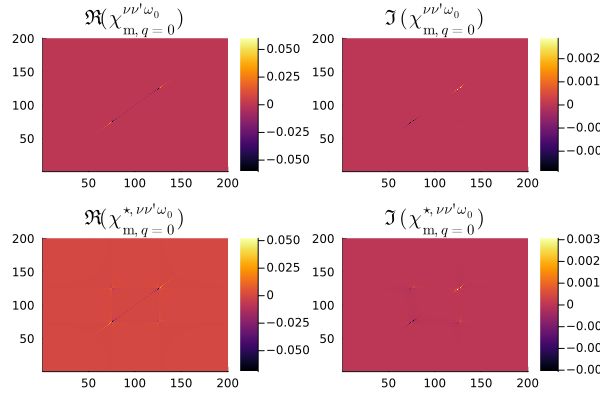

In [6]:
p1 = heatmap(real.(χm_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p2 = heatmap(imag.(χm_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p3 = heatmap(real.(χm_star_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p4 = heatmap(imag.(χm_star_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")

plot(p1, p2, p3, p4)

# Matrix identity for difference between chi and chi^star


Let A and (A+B) be invertible matrices and rank(B) = 1. Then:

$(A+B)^{-1} = A^{-1} - \frac{1}{1+g} A^{-1} B A^{-1}$ and $g = Tr(B A^{1}) \neq 1$



In [88]:
using LinearAlgebra

ωi = 31
qi = 1
β  = lDGAhelper.mP.β
A  = deepcopy(lDGAhelper.Γ_m[:,:,ωi]) + Diagonal(1.0 ./ bubble.data[qi,bubble.ν_shell_size+1:end-bubble.ν_shell_size,ωi])   
Γ_m_inv = inv(A) 
U_M     = lDGAhelper.mP.U .* ones(size(Γ_m_inv));
g = tr(U_M * Γ_m_inv)

diff_test = (Γ_m_inv * (U_M * Γ_m_inv)) ./ (1+g) ;

In [89]:
t1 = χm_gen[:,:,1,ωi];
t2 = χm_star_gen[:,:,1,ωi];
diff_q0 = t1 .- t2 

t1 = χm_gen[:,:,1,ωi];
t2 = χm_star_gen[:,:,1,ωi];
diff_q1 = t1 .- t2 

maximum(abs.(diff_q1 .- diff_test))

1.561441699161451e-17